In [19]:
import io
from nbformat import current

with io.open("Vorhersagen_von_Stornierungen_bei_Hotelreservierungen.ipynb", 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print(word_count)

2562


c:\Users\habou\anaconda3\lib\site-packages\nbformat\v4\convert.py:22: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb, version=version)


<span style="margin:auto; display:table;font-size:18px;font-family:Arial">Fachhochschule Südwestfalen</span>

<span style="margin:auto; display:table;font-size:18px;font-family:Arial">Semesterabschließende schriftliche Ausarbeitung im Modul Machine Learning (SS2023)</span>

<span style="margin:auto; display:table;font-size:30px;font-family:Arial">Vohersagen von Stonierungen bei Hotelreservierungen</span> 

<span style="margin:auto; display:table;font-size:18px;font-family:Arial">Bearbeitet von Alaa Haboubi</span>

<span style="margin:auto; display:table;font-size:18px;font-family:Arial">26. Februar 2024</span>


<p style="margin-left : 20%;"><strong>Inhaltsverzeichnis</strong></p>
<p style="margin-left : 20%;"><strong>1. Einleitung</strong></p>
<p style="margin-left : 20%;"><strong>2. Datensatzbeschreibung</strong></p>
<p style="margin-left : 22%;"><strong>2.1 Herkunft des Datensatzes</strong></p>
<p style="margin-left : 22%;"><strong>2.2 Variablenbeschreibung</strong></p>
<p style="margin-left : 20%;"><strong>3. Datenaufbereitung</strong></p>
<p style="margin-left : 22%;"><strong>3.1 Datenbereinigung</strong></p>
<p style="margin-left : 22%;"><strong>3.2 Datenformatierung</strong></p>
<p style="margin-left : 20%;"><strong>4 Explorative Datenanalyse</strong></p>
<p style="margin-left : 22%;"><strong>4.1 Deskriptive Statistiken</strong></p>
<p style="margin-left : 22%;"><strong>4.2 Visualisierungen</strong></p>
<p style="margin-left : 20%;"><strong>5. Feature-Engineering</strong></p>
<p style="margin-left : 22%;"><strong>5.1 Auswahl relevanter Features</strong></p>
<p style="margin-left : 22%;"><strong>5.2 Feature-Skalierung</strong></p>
<p style="margin-left : 20%;"><strong>6. Modell Auswahl und Training</strong></p>
<p style="margin-left : 20%;"><strong>7. Modell Bewertung</strong></p>
<p style="margin-left : 20%;"><strong>8. Modell Speichern </strong></p>

## 1. Einleitung 

Das Hotelleriebranche ist ein schnelllebiger und hart umkämpfter Sektor, der in hohem Maße auf das Reservierungsmanagement angewiesen ist. Hotelbetreiber stehen vor der Herausforderung, die Buchungsvorgänge zu optimieren und gleichzeitig die Zimmerauslastung zu maximieren. Eines der Probleme, mit denen sie konfrontiert sind, sind Reservierungsstornierungen, die zu finanziellen Verlusten führen können.
Ziel dieser Arbeit ist es, einen datengesteuerten Ansatz zur Vorhersage von Reservierungsstornierungen vorzustellen. Dazu verwenden wir den Datensatz Reservation Cancellation Prediction von Kaggle, der umfangreiche Informationen über Hotelreservierungen und die damit verbundenen Stornierungen enthält. Anhand dieser Daten werden wir ein Modell entwickeln, das Hotelbetreibern helfen kann, das Stornierungsrisiko zu quantifizieren und ihre betrieblichen Entscheidungen entsprechend anzupassen.
Durch die Vorhersage, wann Kunden ihre Reservierungen stornieren werden, können Hotelbetreiber fundierte Entscheidungen treffen, um ihre Geschäftsstrategien zu optimieren, Ressourcen effizient zuzuweisen und letztendlich ihre Rentabilität zu steigern.

## 2. Datensatzbeschreibung

### 2.1 Herkunft des Datensatzes

Der verwendete Datensatz für die Analyse der Reservierungsstornierungen stammt von Kaggle [1], einer beliebten Plattform für datenbezogene Wettbewerbe und Projekte. Der Datensatz mit dem Titel "Reservation Cancellation Prediction" steht der Öffentlichkeit zur Verfügung. Durch die Bereitstellung dieses Datensatzes können wir das Problem der Stornierung von Reservierungen anhand von Daten untersuchen. Erarbeiten Sie Lösungen, die sich an realen Situationen orientieren.

### 2.2 Variablenbeschreibung

In diesem Abschnitt verwenden wir nur die weit verbreitete Pandas-Bibliothek, die sich zu einem leistungsstarken Werkzeug für die Datenbearbeitung und -analyse entwickelt hat. pandas kombiniert die hohe Leistungsfähigkeit bei Arrays in NumPy mit der flexiblen
Datenmanipulation von Spreadsheets und relationalen Datenbanken (wie etwa SQL). Es bietet eine ausgefeilte Indizierung, wodurch man die Daten einfach umgestalten, zurechtschneiden und zusammenfassen sowie Teilmengen von Daten auswählen kann. [2]

In [3]:
import pandas as pd

data_path = 'data/train.csv'
data = pd.read_csv(data_path)

# Anzeige der ersten 5 Zeilen der Daten
data.head()


,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


Der Datensatz „Reservation Cancellation Prediction“ enthält eine Vielzahl von Variablen, die Informationen über Reservierungen und die damit verbundenen Merkmale bereitstellen. Nachfolgend werden die Variablen beschrieben, die in unserer Analyse berücksichtigt wurden:<br>
<p style="display: list-item; margin-left : 1em;">no_of_adults: Anzahl der Erwachsenen in der Buchung</p>
<p style="display: list-item; margin-left : 1em;">no_of_children: Anzahl der Kinder in der Buchung</p>
<p style="display: list-item; margin-left : 1em;">no_of_weekend_nights: Anzahl der Übernachtungen an Wochenenden</p>
<p style="display: list-item; margin-left : 1em;">no_of_week_nights: Anzahl der Übernachtungen an Wochentagen</p>
<p style="display: list-item; margin-left : 1em;">type_of_meal_plan: Art der gebuchten Verpflegung (z. B. Frühstück, Halbpension)</p>
<p style="display: list-item; margin-left : 1em;">required_car_parking_space: Anzahl der benötigten Parkplätze</p>
<p style="display: list-item; margin-left : 1em;">room_type_reserved: Anzahl der speziellen Anfragen (z. B. Zusatzbett, Kinderbett)</p>
<p style="display: list-item; margin-left : 1em;">lead_time: Anzahl der Tage zwischen der Buchung und dem Ankunftsdatum</p>
<p style="display: list-item; margin-left : 1em;">arrival_year: Das Jahr des Ankunftsdatums</p>
<p style="display: list-item; margin-left : 1em;">arrival_month: Der Monat des Ankunftsdatums</p>
<p style="display: list-item; margin-left : 1em;">arrival_date: Der Tag des Ankunftsdatums</p>
<p style="display: list-item; margin-left : 1em;">market_segment_type: Bezeichnung des Marktsegments.</p>
<p style="display: list-item; margin-left : 1em;">repeated_guest: Gibt an, ob der Gast ein wiederkehrender Gast ist (1) oder nicht (0)</p>
<p style="display: list-item; margin-left : 1em;">no_of_previous_cancellations: Anzahl der vorherigen Stornierungen durch den Gast</p>
<p style="display: list-item; margin-left : 1em;">no_of_previous_bookings_not_canceled: Anzahl der vorherigen Buchungen, die nicht storniert wurden</p>
<p style="display: list-item; margin-left : 1em;">avg_price_per_room: Durchschnittlicher täglicher Preis für das Zimmer</p>
<p style="display: list-item; margin-left : 1em;">no_of_special_requests: Anzahl der speziellen Anfragen (z. B. Zusatzbett, Kinderbett)</p>
<p style="display: list-item; margin-left : 1em;">booking_status: Flag, das angibt, ob die Buchung storniert wurde oder nicht.</p>

## 3. Datenaufbereitung

### 3.1 Datenbereinigung

Zuerst prüfen wir die Daten auf Duplikate.

In [4]:
# Duplikte Werte
duplicates = data.duplicated().sum()
duplicates

0

Anschließend werden fehlende Werte ermittel und behandelt. Dies kann durch Entfernen von Zeilen oder Ersetzen fehlender Werte geschehen,
je nachdem, wie groß die fehlenden Daten sind.

In [5]:
# Fehlende Werte
missing_values = data.isnull().sum()
missing_values

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Es gibt keine Duplikate in den Daten und es scheint keine fehlenden Werte zu geben. Das ist eine gute Nachricht, denn es vereinfacht die Datenvorbereitung. Alle Variablen sind vollständig, so dass wir keine Zeilen löschen oder fehlende Werte ersetzen müssen.

### 3.2 Datenformatierung

Zweitens  sollen wir sucher stellen, dass alle Daten im richtigen Format sind. Um festzustellen, ob im Datensatz kategorische Variablen vorhanden sind, sollten wir uns die Daten und die Beschreibung jeder Variable genauer ansehen.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

Nachdem Ausführung den 'data.info()' schauen wir dass, die alle Variablen als 'int64' formatieret sind, mit Ausnahme von 
'avg_price_per_room' die als float64 formatiert ist, deutet dies darauf hin, dass sie numerisch kodiert wurden.

## 4. Explorative Datenanalyse

### 4.1 Deskriptive Statistiken

in diesem Teil erheben wir grundlegende statistische Daten, um uns einen Überblick über die Verteilung und die zentralen Trends der Variablen zu verschaffen. 

In [7]:
descriptive_statistics = data.describe()
descriptive_statistics

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000
mean,21049.500000,1.920713,0.141093,0.884632,2.398005,0.239192,0.025249,0.428931,103.888029,2017.856295,7.593539,15.902945,0.728504,0.029192,0.019715,0.175772,104.566377,0.571734,0.392019
std,12153.367503,0.524950,0.450128,0.885693,1.427330,0.587674,0.156884,0.832605,81.069343,0.350795,2.829395,8.888582,0.633529,0.168347,0.325837,1.732121,37.139165,0.775041,0.488207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10524.750000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,37.000000,2018.000000,6.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000
50%,21049.500000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,93.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,31574.250000,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,155.000000,2018.000000,10.000000,24.000000,1.000000,0.000000,0.000000,0.000000,123.300000,1.000000,1.000000
max,42099.000000,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


Die deskriptiven Statistiken bieten einen umfassenden Überblick über die Daten:
<p style="display: list-item; margin-left : 1em;">Anzahl der Buchungen: Es gibt insgesamt 42.100 Datensätze.</p>
<p style="display: list-item; margin-left : 1em;">Erwachsene und Kinder: Die meisten Buchungen enthalten 2 Erwachsene und keine Kinder.</p>
<p style="display: list-item; margin-left : 1em;">Übernachtungen: Die meisten Aufenthalte umfassen weniger als 3 Wochennächte und bis zu 2 Wochenendnächte.</p>
<p style="display: list-item; margin-left : 1em;">Mahlzeitenplan: Die Mehrheit der Buchungen hat den Mahlzeitenplan mit dem Wert 0, was vermutlich "kein Mahlzeitenplan" oder "nur Frühstück" darstellen könnte.</p>
<p style="display: list-item; margin-left : 1em;">Parkplatzbedarf: Sehr wenige Buchungen erfordern einen Parkplatz.</p>
<p style="display: list-item; margin-left : 1em;">Zimmertyp: Die meisten Buchungen reservieren den Zimmertyp mit dem Wert 0, was auf einen bestimmten Standard oder keine  speziellen Anfragen (z. B. Zusatzbett, Kinderbett).</p>
<p style="display: list-item; margin-left : 1em;">Lead Time: Die durchschnittliche Vorlaufzeit beträgt etwa 104 Tage, mit einer großen Spannweite.</p>
<p style="display: list-item; margin-left : 1em;">Wiederkehrende Gäste: Nur ein kleiner Prozentsatz der Buchungen stammt von wiederkehrenden Gästen.</p>
<p style="display: list-item; margin-left : 1em;">Stornierungen: Es gibt eine geringe Anzahl von vorherigen Stornierungen und nicht stornierten Buchungen pro Gast.</p>
<p style="display: list-item; margin-left : 1em;">Durchschnittspreis pro Zimmer: Der durchschnittliche Preis liegt bei etwa 104,57 €.</p>
<p style="display: list-item; margin-left : 1em;">Sonderwünsche: Die Anzahl der Sonderwünsche variiert, mit einem Durchschnitt von etwa 0,57 pro Buchung.</p>
<p style="display: list-item; margin-left : 1em;">Buchungsstatus: Etwa 39% der Buchungen wurden wahrgenommen (Wert 1), während der Rest storniert wurde.</p>



### 4.2 Visualisierungen

Um die Daten besser zu verstehen, erstellen wir einige Visualisierungen, 
darunter die Verteilung der Zielvariablen (booking_status), 
die Verteilung der Anzahl der Erwachsenen(no_of_adults), Ankunftsmonat (arrival_month) und die Vorlaufzeit (lead_time).

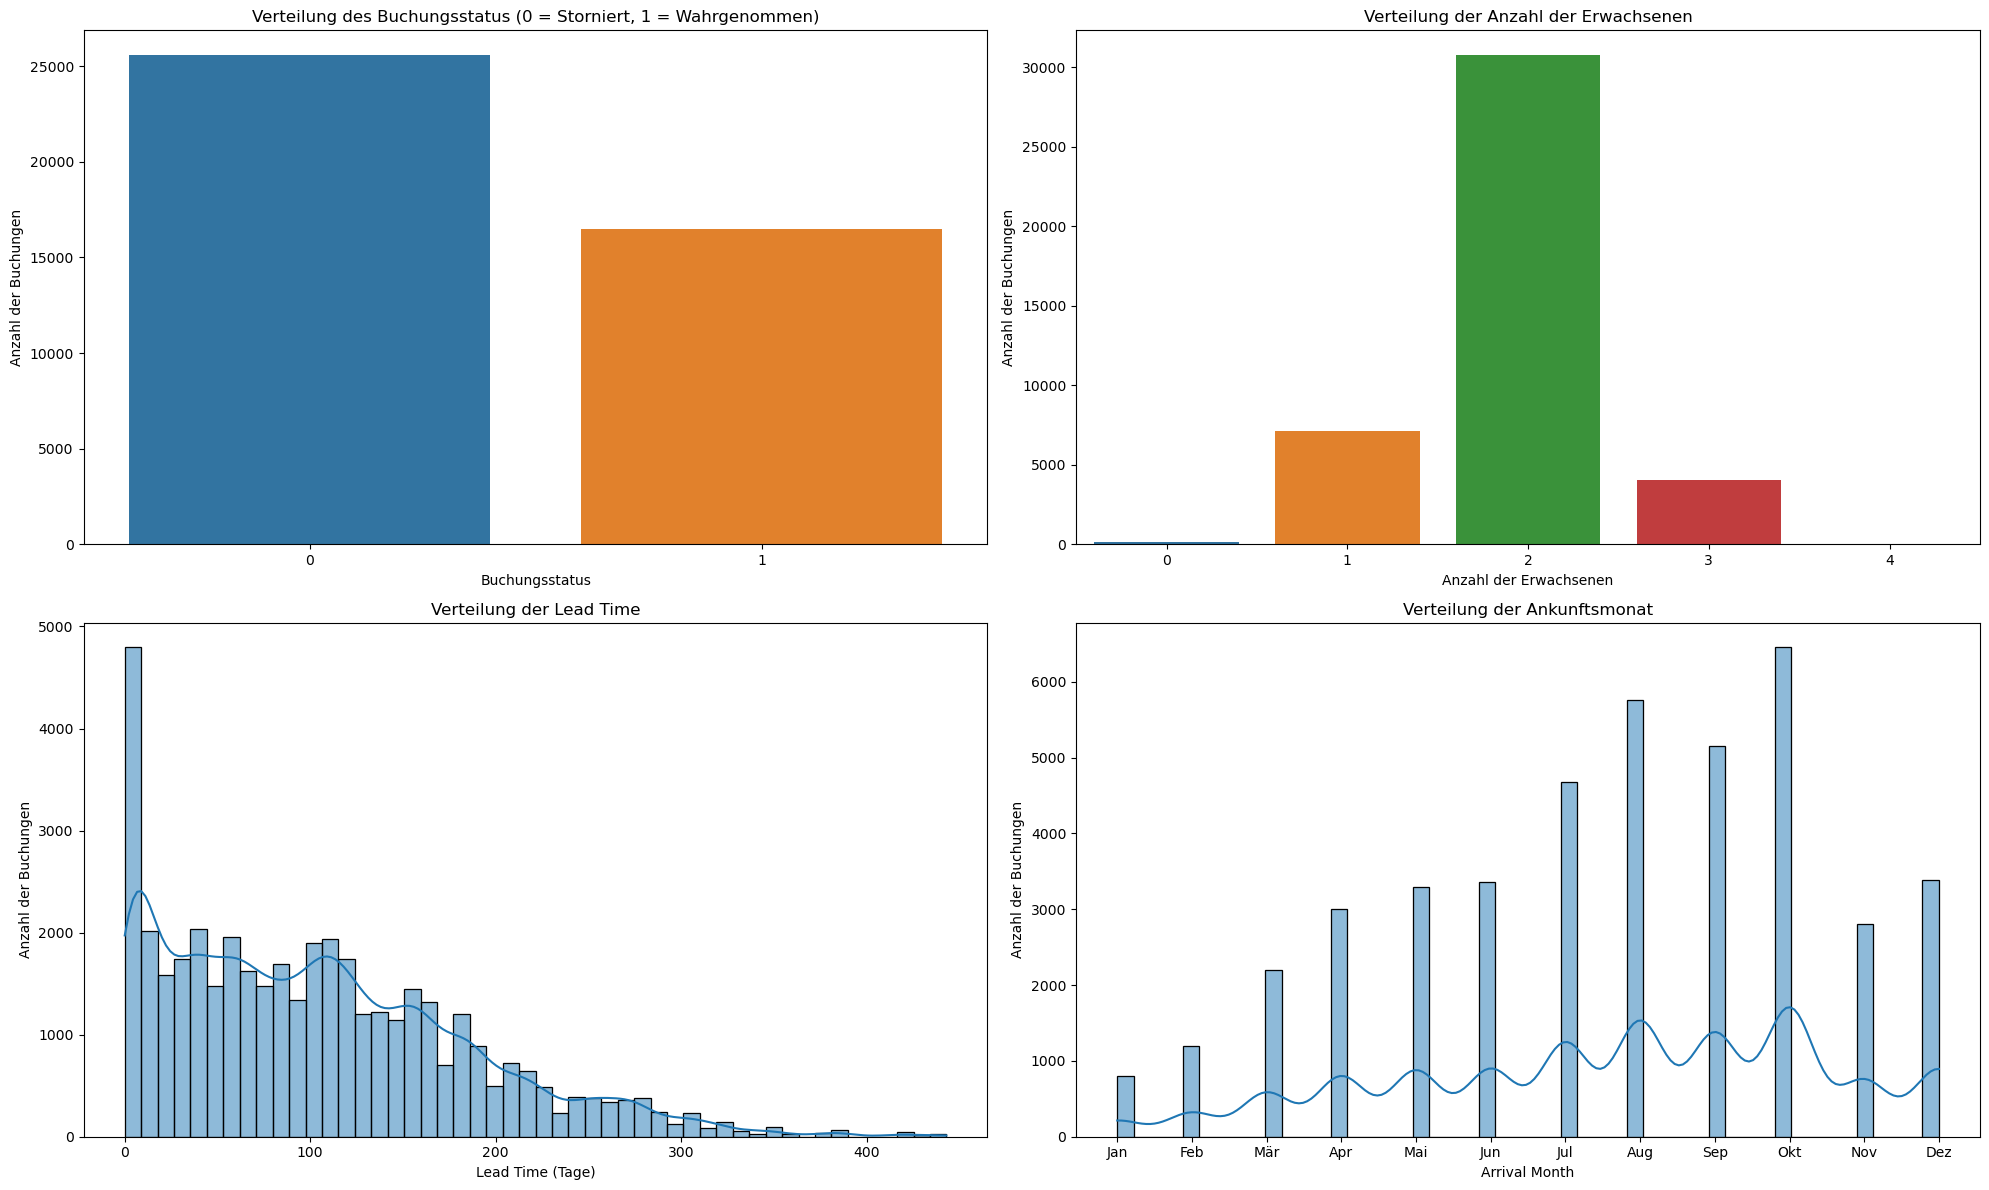

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(data):
    
    fig, axs = plt.subplots(2, 2, figsize=(20, 12)) 
    
    # Verteilung des Buchungsstatus
    sns.countplot(x='booking_status', data=data, ax=axs[0, 0])
    axs[0, 0].set_title('Verteilung des Buchungsstatus (0 = Storniert, 1 = Wahrgenommen)')
    axs[0, 0].set_xlabel('Buchungsstatus')
    axs[0, 0].set_ylabel('Anzahl der Buchungen')
    
    # Verteilung der Anzahl der Erwachsenen
    sns.countplot(x='no_of_adults', data=data, ax=axs[0, 1])
    axs[0, 1].set_title('Verteilung der Anzahl der Erwachsenen')
    axs[0, 1].set_xlabel('Anzahl der Erwachsenen')
    axs[0, 1].set_ylabel('Anzahl der Buchungen')
    
    # Verteilung der Lead Time
    sns.histplot(data['lead_time'], bins=50, kde=True, ax=axs[1, 0])
    axs[1, 0].set_title('Verteilung der Lead Time')
    axs[1, 0].set_xlabel('Lead Time (Tage)')
    axs[1, 0].set_ylabel('Anzahl der Buchungen')
    
    # Verteilung der Ankunftsmonat
    sns.histplot(data['arrival_month'], bins=50, kde=True, ax=axs[1, 1])
    axs[1, 1].set_title('Verteilung der Ankunftsmonat')
    axs[1, 1].set_xlabel('Arrival Month')
    axs[1, 1].set_ylabel('Anzahl der Buchungen')
    axs[1, 1].set_xticks(range(1, 13), ['Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez'])
    
    plt.tight_layout()
    plt.show()

plot_distribution(data)

Die Visualisierungen liefern zusätzliche Informationen zu den Daten :

<p style="display: list-item; margin-left : 1em;">Buchungsstatus: Die Verteilung des Buchungsstatus zeigt, dass ein großer Anteil der Buchungen storniert wird (0), während etwa 39 % der Buchungen angenommen werden (1).</p>
<p style="display: list-item; margin-left : 1em;">Anzahl der Erwachsenen : Die meisten Buchungen sind für 2 Erwachsene, was darauf hindeutet, dass Doppelzimmer die häufigste Buchungsoption sind. Es gibt auch Buchungen für 1, 3 und 4 Erwachsene, diese sind jedoch deutlich seltener.</p>
<p style="display: list-item; margin-left : 1em;">Lead Time:  Die Verteilung der Lead Time zeigt eine rechtsschiefe Verteilung, was bedeutet, dass viele Buchungen mit einer relativ kurzen Vorlaufzeit getätigt werden, während langfristige Buchungen weniger häufig sind.</p>
<p style="display: list-item; margin-left : 1em;">Ankunftsmonate: gibt es in bestimmten Monaten Spitzen, was auf einen saisonalen Charakter des Buchungsverhaltens hindeutet. Die höchsten Spitzen scheinen in den Sommermonaten und gegen Ende oder Anfang des Jahres zu liegen.</p>

### 4.2 Korrelationsanalyse

Anschließend führen wir eine Korrelationsanalyse durch, um die Beziehungen zwischen den Funktionen und der Zielvariablen (booking_status) zu verstehen. Diese Analyse hilft uns zu erkennen, welche Variablen den größten Einfluss auf die Wahrscheinlichkeit einer Stornierung oder die Wahrnehmung der Buchung haben können.

Die Korrelation misst die lineare Beziehung zwischen zwei Variablen. Sie liegt zwischen -1 und +1.
Positive Werte deuten auf eine positive lineare Beziehung hin, wenn eine Variable zunimmt, nimmt die andere zu, während negative Werte eine negative lineare Beziehung anzeigen, wenn eine Variable zunimmt, nimmt die andere ab. Eine Korrelation nahe 0 zeigt an, dass es keine lineare Beziehung zwischen den Variablen gibt.

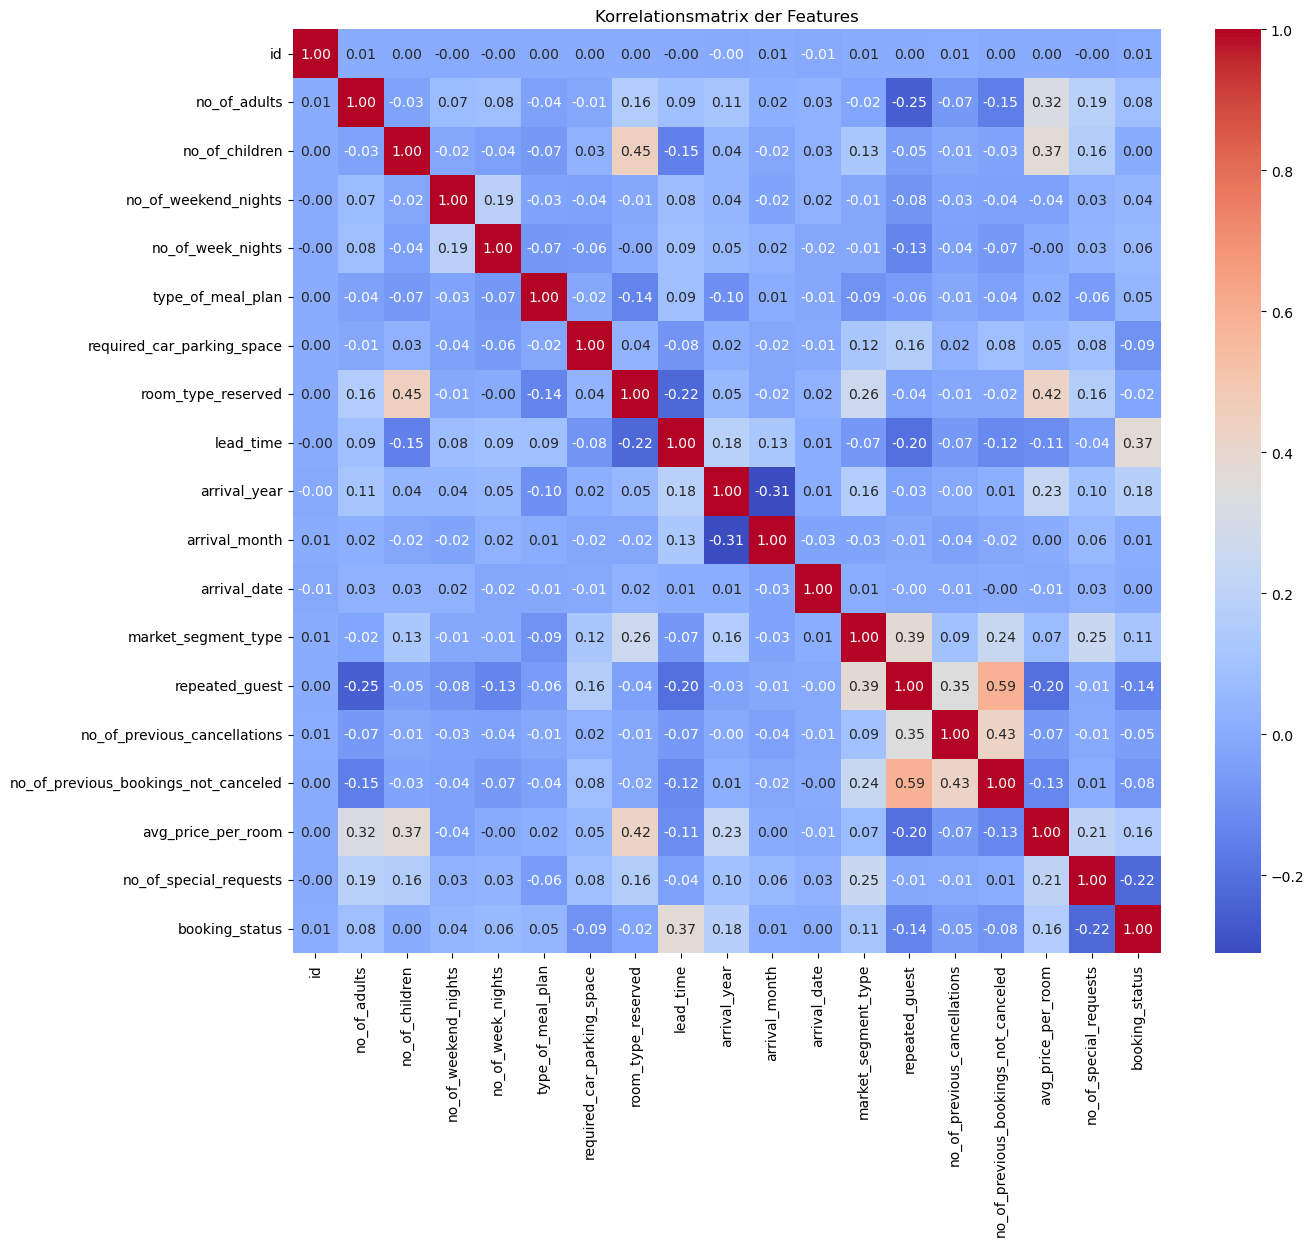

booking_status                          1.000000
lead_time                               0.374865
arrival_year                            0.178326
avg_price_per_room                      0.157484
market_segment_type                     0.112648
no_of_adults                            0.079760
no_of_week_nights                       0.058506
type_of_meal_plan                       0.045980
no_of_weekend_nights                    0.044279
arrival_month                           0.007639
id                                      0.007264
no_of_children                          0.004260
arrival_date                            0.003124
room_type_reserved                     -0.023087
no_of_previous_cancellations           -0.045599
no_of_previous_bookings_not_canceled   -0.080166
required_car_parking_space             -0.093262
repeated_guest                         -0.136065
no_of_special_requests                 -0.220278
Name: booking_status, dtype: float64

In [9]:

correlation_matrix = data.corr()


plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Korrelationsmatrix der Features')
plt.show()

korrelation_zur_zielvariable = correlation_matrix['booking_status'].sort_values(ascending=False)
korrelation_zur_zielvariable

Die Korrelationsanalyse zeigt die Beziehungen zwischen den verschiedenen Features und dem Buchungsstatus:

<p style="display: list-item; margin-left : 1em;"> Positive Korrelationen: Features wie 'lead_time', 'arrival_year', und 'avg_price_per_room' zeigen eine positive Korrelation mit dem Buchungsstatus, was bedeutet, dass höhere Werte in diesen Variablen mit einer höheren Wahrscheinlichkeit einer wahrgenommenen Buchung verbunden sein könnten.</p>
<p style="display: list-item; margin-left : 1em;"> Negative Korrelationen: 'no_of_special_requests', 'repeated_guest', und 'required_car_parking_space' zeigen negative Korrelationen mit dem Buchungsstatus, was darauf hindeutet, dass Buchungen mit mehr Sonderwünschen oder von wiederkehrenden Gästen eher wahrgenommen werden als storniert.</p>
<p style="display: list-item; margin-left : 1em;"> Geringe Korrelationen: Einige Features, wie 'no_of_children', 'arrival_date', und 'room_type_reserved', zeigen sehr geringe Korrelationen mit dem Buchungsstatus, was darauf hindeutet, dass sie möglicherweise weniger Einfluss auf die Entscheidung zwischen Stornierung und Wahrnehmung der Buchung haben.</p>

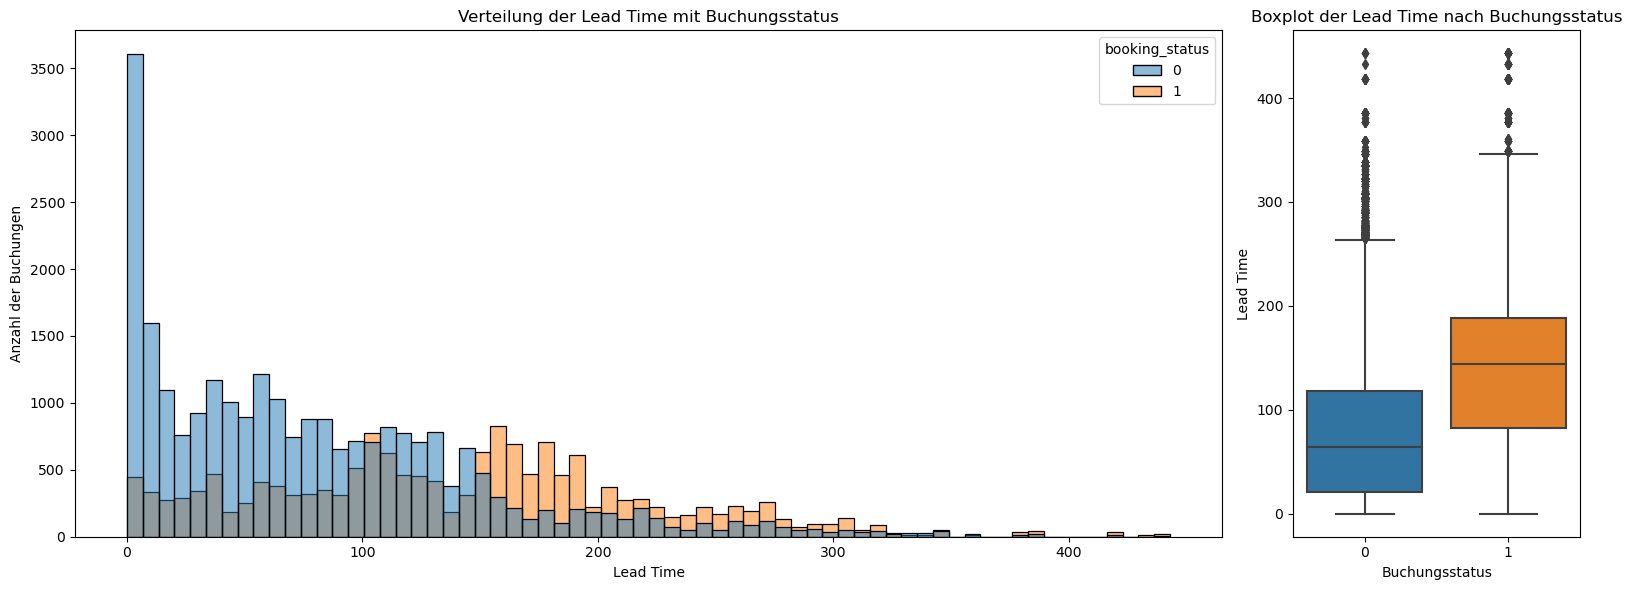

In [10]:
# Erstellen von Boxplot für Lead Time gegen Buchungsstatus

fig, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [4, 1]})

sns.histplot(data=data, x="lead_time", hue="booking_status", ax=axs[0], kde=False)

sns.boxplot(x="booking_status", y="lead_time", data=data, ax=axs[1])

axs[0].set_title('Verteilung der Lead Time mit Buchungsstatus')
axs[0].set_xlabel('Lead Time')
axs[0].set_ylabel('Anzahl der Buchungen')

axs[1].set_title('Boxplot der Lead Time nach Buchungsstatus')
axs[1].set_xlabel('Buchungsstatus')
axs[1].set_ylabel('Lead Time')

plt.tight_layout()
plt.show()

Die höchste lead_time Daten liegen bei 0 was bedeutet, dass die meisten Buchungen am selben Tag wie die Ankunft getätigt wurden.
Der Boxplot zeigt, dass für Buchungen mit Status 0  die Lead Time eine breitere Spanne aufweisen und mehr Ausreißer im oberen Bereich haben, während Buchungen mit Status 1  eine höhere Mediane aufweisen, was auf längere Lead Time hinweist.
Insgesamt scheint es eine größere Streuung der Lead-Zeiten bei stornierten Buchungen (Status 0) zu geben und die wahrgenommenen Buchungen (Status 1) tendieren zu längeren Lead Time, obwohl beide Gruppen eine Tendenz zu kürzeren Lead Time zeigen.

## 5. Feature-Engineering

Auf der Grundlage der explorativen Datenanalyse und der Korrelationsanalyse führen wir nun das Feature-Engineering durch, um den Datensatz für die Modellbildung vorzubereiten. Dies umfasst die Auswahl relevanter Features.

### 5.1 Auswahl relevanter Features

Nachdem der Korrelationsanalyse und unserem Verständnis die Daten könnten wir entscheiden, einige der Variablen mit sehr geringer Korrelation zum Buchungsstatus (wie 'required_car_parking_space', 'repeated_guest' und 'no_of_special_requests') auszuschließen. Jedoch werden wir in diesem Beispiel alle Features beibehalten, um das Modell mit einem vollständigen Satz von Informationen trainieren zu können.

### 5.2 Feature-Skalierung

Wir skalieren die Merkmale, um sicherzustellen, dass keine Variablen aufgrund ihrer Größe einen übermäßigen Einfluss auf das Modell haben.

Die Skalierung von Merkmalen ist eine Methode zur Normalisierung des Bereichs der unabhängigen Variablen oder Merkmale von Daten. In der Datenverarbeitung ist sie auch als Datennormalisierung bekannt und wird im Allgemeinen während der Datenvorverarbeitung durchgeführt [3].


Nun führen wir eine Merkmalsskalierung durch und segmentieren den Datensatz für Training und Validierung. 
Dafür importieren wir die klasse <strong>train_test_split</strong> von die package <strong>sklearn.model_selection</strong> um die Daten aufzuteilen und die Klasse <strong>StandardScaler</strong> um Feature zu skalieren.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Trennen der Features und der Zielvariable
X = data.drop('booking_status', axis=1)
y = data['booking_status']


# Aufteilung in Trainings und Testdatensatz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Skalierung
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((33680, 18), (8420, 18))

Der Datensatz wurde in einen Trainingsdatensatz und einen Testdatensatz mit 33.680 Einträgen für das Training und 8.420 Einträgen für den Test aufgeteilt. Jeder Datensatz enthält 18 skalierte Merkmale, um eine einheitliche Skalierung für das Modelltraining zu gewährleisten.

## 6. Modell Auswahl und Training

Die Modellauswahl zur Vorhersage von Hotelbuchungen basiert auf der Struktur und Art der verfügbaren Datenvariablen.
Für unseren Fall schwanke ich zwischen drei Modellen:
<p style="display: list-item; margin-left : 1em;"><strong>Logistische Regression:</strong> eignet sich besonders gut für binäre Klassifizierung Probleme und ist eine robuste Wahl für die Vorhersage der Wahrscheinlichkeit einer Stornierung oder der Wahrnehmung einer Buchung, da die Variablen in unserem Datensatz bereits numerisch kodiert sind und lineare Beziehungen zur Zielvariablen aufweisen könnten.</p>
<p style="display: list-item; margin-left : 1em;"><strong>Entscheidungsbäume</strong> bieten einen klaren Vorteil, wenn es darum geht, die komplexen und Beziehungen zwischen den Variablen zu modellieren</p>
<p style="display: list-item; margin-left : 1em;"><strong>Random Forests</strong> ist eine Ensemble-Lernmethode für Klassifizierung, Regression und andere Aufgaben, die durch die Konstruktion einer Vielzahl von Entscheidungsbäumen zur Trainingszeit erfolgt [4]. Sie eignen sich gut für unseren Datensatz, der komplexe Interaktionen zwischen Entitäten effizient verarbeiten kann</p>

Um herauszufinden, welches das beste Modell für unsere Daten ist, trainieren wir jedes Modell anhand des Trainingsdatensatzes und bewerten seine Leistung durch seine Genauigkeit (accuracy) anhand des Testdatensatzes.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialisierung die Modelle
logistic_regression = LogisticRegression(random_state=42)
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
random_forest_classifier = RandomForestClassifier(random_state=42)

# Liste der Modelle für die Iteration
modelle = [('Logistic Regression', logistic_regression), 
           ('Decision Tree Classifier', decision_tree_classifier), 
           ('Random Forest Classifier', random_forest_classifier)]

ergebnisse = {}

for name, modell in modelle:
    # Training
    modell.fit(X_train_scaled, y_train)
    # Vorhersage
    y_prediction = modell.predict(X_test_scaled)
    # Bewertung
    accuracy = accuracy_score(y_test, y_prediction)
    
    print(f'Die Genauigkeit für {name} ist {accuracy:.2f} ')
    


Die Genauigkeit für Logistic Regression ist 0.77 
Die Genauigkeit für Decision Tree Classifier ist 0.74 
Die Genauigkeit für Random Forest Classifier ist 0.81 


Mit einer Genauigkeit von etwa 81 % war der Random Forest das genaueste der drei Modelle. Random Forests sind dafür bekannt, dass sie mit einer Vielzahl von Datenstrukturen gut umgehen können und eine Overfitting besser vermeiden, da sie auf dem Prinzip des Ensembling beruhen, bei dem die Vorhersagen mehrerer Entscheidungsbäume kombiniert werden.

## 7. Modell Bewertung

Da der Random Forest die hohe Genauigkeit hat, werden wir ihn in diesem Teil berücksichtigen. Nachfolgend beziehen sich die Abschnitte auf [5] und [6].

Bei der Modellevaluierung werden verschiedene Bewertungsmaßstäbe verwendet, um die Leistung eines maschinellen Lernmodells sowie seine Stärken und Schwächen zu verstehen. Die Modellevaluierung ist wichtig, um die Wirksamkeit eines Modells in den ersten Forschungsphasen zu beurteilen, und sie spielt auch eine Rolle bei der Modellüberwachung.

Zu den gängigsten Metriken zur Messung der Klassifizierungsleistung gehören Accuracy, precision, recall, f1-score und Konfusionsmatrix.

<p style="display: list-item; margin-left : 1em;"><strong>Accuracy </strong>misst, wie oft der Klassifikator richtige Vorhersagen macht, da es das Verhältnis zwischen der Anzahl der richtigen Vorhersagen und der Gesamtzahl der Vorhersagen ist.</p>
<p style="display: list-item; margin-left : 1em;"><strong>Precision </strong>misst den Anteil der vorhergesagten positiven Ergebnisse, die tatsächlich positiv sind. Die Präzision ist eine gute Wahl der Evaluierungsmetrik, wenn Sie sich Ihrer Vorhersage sehr sicher sein wollen.</p>
<p style="display: list-item; margin-left : 1em;"><strong>recall </strong>misst, wie oft ein Modell für maschinelles Lernen positive Instanzen (true positives) aus allen tatsächlich positiven Proben im Datensatz korrekt identifiziert. recall kann berechnet werden, indem die Anzahl der echten Positiven durch die Anzahl der positiven Instanzen dividiert wird.</p>
<p style="display: list-item; margin-left : 1em;"><strong>F1-Score </strong>Der F1-Score ist ein Maß für das harmonische Mittel aus Precision und Recall.</p>
<p style="display: list-item; margin-left : 1em;"><strong>Konfusionsmatrix </strong>Eine Konfusionsmatrix (oder Konfusionstabelle) zeigt eine detailliertere Aufschlüsselung der richtigen und falschen Klassifizierungen für jede Klasse. Die Verwendung einer Konfusionsmatrix ist nützlich, wenn wir den Unterschied zwischen den Klassen verstehen wollen.</p>

In [16]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set
random_forest_classifier.fit(X_train_scaled, y_train)
y_random_forest_pred= random_forest_classifier.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_random_forest_pred)
classification_rep = classification_report(y_test, y_random_forest_pred)

print(classification_rep)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      5150
           1       0.78      0.72      0.75      3270

    accuracy                           0.81      8420
   macro avg       0.80      0.80      0.80      8420
weighted avg       0.81      0.81      0.81      8420



<strong>Classification Report</strong>
<p style="display: list-item; margin-left : 1em;"><strong>Klasse 0 (Storniert):</strong>
<p style="display: list-item; margin-left : 2em;"><strong>Precision: </strong>83% der Vorhersagen des Modells für die Klasse "Storniert" sind korrekt.</p>
<p style="display: list-item; margin-left : 2em;"><strong>Recall: </strong> Das Modell hat 87% der tatsächlichen "Storniert" Fälle korrekt identifiziert.</p>
<p style="display: list-item; margin-left : 2em;"><strong>F1-Score: </strong> Ein harmonisches Mittel von Precision und Recall für die Klasse "Storniert" ist 85%. Je höher der F1-Score, desto besser ist die Modellleistung.</p>
<p style="display: list-item; margin-left : 2em;"><strong>Support: </strong> Es gab 5150 tatsächliche Fälle von "Storniert" im Testset.</p>
<p style="display: list-item; margin-left : 1em;"><strong>Klasse 1 (Wahrgenommen):</strong>
<p style="display: list-item; margin-left : 2em;"><strong>Precision: </strong>78% der Vorhersagen des Modells für die Klasse "Wahrgenommen" sind korrekt.</p>
<p style="display: list-item; margin-left : 2em;"><strong>Recall: </strong>Das Modell hat 72% der tatsächlichen "Wahrgenommen" Fälle korrekt identifiziert.</p>
<p style="display: list-item; margin-left : 2em;"><strong>F1-Score: </strong>Für die Klasse "Wahrgenommen" ist der F1-Score 75%.</p>
<p style="display: list-item; margin-left : 2em;"><strong>Support: </strong> Es gab 3270 tatsächliche Fälle von "Wahrgenommen" im Testset.</p>

Die Genauigkeit (accuracy) des Modells beträgt 81 %, was bedeutet, dass insgesamt 81% der Vorhersagen des Modells richtig sind.
Der gewichtete Durchschnitt (weighted avg) von Precision, Recall und F1-Score berücksichtigt die Anzahl der Instanzen in jeder Klasse und liefert einen gewichteten Durchschnitt aller Klassen. Alle diese Werte liegen bei 81%.


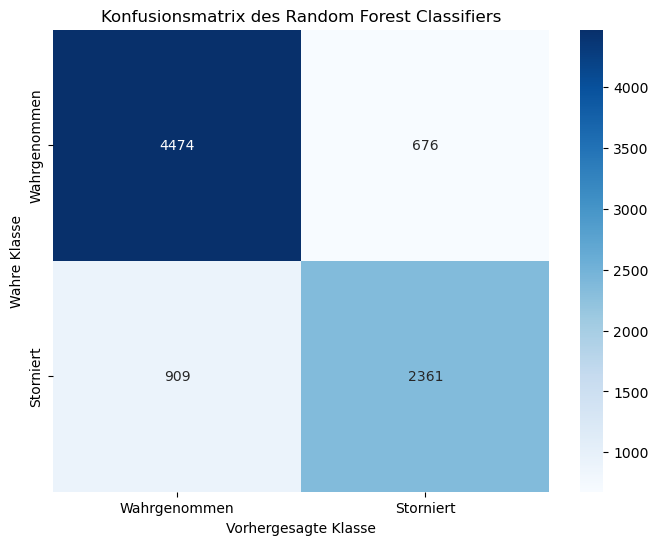

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Erstellung der Konfusionsmatrix
conf_matrix = confusion_matrix(y_test, y_random_forest_pred)

# Visualisierung der Konfusionsmatrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Wahrgenommen', 'Storniert'], yticklabels=['Wahrgenommen', 'Storniert'])
plt.title('Konfusionsmatrix des Random Forest Classifiers')
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Wahre Klasse')
plt.show()


<strong>Confusion Matrix</strong>
<p style="display: list-item; margin-left : 1em;"><strong>Oben links (True Positive):</strong> Das Modell hat 4474 Fälle von "wahrgenommen" korrekt als "wahrgenommen" klassifiziert. Dies ist die Anzahl der korrekten Vorhersagen für Buchungen, die tatsächlich stattgefunden haben.
<p style="display: list-item; margin-left : 1em;"><strong>Oben rechts (False Negative):</strong> Es gab 676 Fälle, in denen das Modell fälschlicherweise vorhersagte, dass Buchungen storniert werden würden, obwohl sie tatsächlich eingegangen waren.
<p style="display: list-item; margin-left : 1em;"><strong>Unten links (False Positive):</strong> In 909 Fällen hat das Modell fälschlicherweise angenommen, dass Buchungen wahrgenommen werden, während sie in Wirklichkeit storniert wurden. 
<p style="display: list-item; margin-left : 1em;"><strong>Unten rechts (True Negative):</strong> Schließlich hat das Modell 2361 tatsächliche Stornierungen korrekt identifiziert.

Das Modell ist tendenziell gut darin, sowohl wahrgenommene als auch stornierte Buchungen zu erkennen, wobei die Leistung bei der Erkennung von Stornierungen höher ist.
Die Zahl der falschen Negativ Meldungen ist geringer als die der falschen Positiv Meldungen, was darauf schließen lässt, dass das Modell bei der Vorhersage von Stornierungen vorsichtiger ist.

### 8. Modell Speichern 

Zum Speichern das Modell können wir die Pickle Package verwenden. Pickle ist die Standardmethode zum Serialisieren von Objekten in Python.
Später können wir diese Datei laden, um Ihr Modell zu deserialisieren und damit neue Vorhersagen zu treffen.

In [61]:
import pickle

# Speicherpfad für das Random Forest Modell im PKL-Format
random_forest_model_path = 'data/random_forest_model.pkl'  

# Speichern des Modell
with open(random_forest_model_path, 'wb') as file:
    pickle.dump(random_forest_classifier, file)

In [63]:
# Das Modell laden
with open(random_forest_model_path, 'rb') as file:
    loaded_model = pickle.load(file)

    
result = loaded_model.score(X_test_scaled, y_test)
print(result)

0.8117577197149644


Überprüfen wir die 10 erste Vorhersage

In [18]:
# vergleich zwischen Echte Werte und Vorhersagewerte
df = pd.DataFrame({'Real Values': y_test, 'Prediction': y_random_forest_pred})
df.head(10)

,Real Values,Prediction
8768,0,0
38340,1,1
7104,0,0
36898,0,0
9747,0,0
21666,0,0
7624,0,1
35051,0,0
37073,1,1
32048,1,1


### Literaturverzeichnis

[1] https://www.kaggle.com/datasets/gauravduttakiit/reservation-cancellation-prediction</br>
[2] William McKinney. (2018). Datenanalyse mit Python: Auswertung von daten mit Pandas, NumPy, und IPython (2nd ed.). O'Reilly Media. </br>
[3] https://www.atoti.io/articles/when-to-perform-a-feature-scaling/#:~:text=Feature%20scaling%20is%20a%20method,during%20the%20data%20preprocessing%20step. </br>
[4] https://en.wikipedia.org/wiki/Random_forest </br>
[5] https://domino.ai/data-science-dictionary/model-evaluation </br>
[6] https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall#what-is-recall